# Código anterior

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('/users/memobarbosa/Análisis de datos/Parte 2/M19 - Exploratory Data Analysis Kaggle Project')

# Se usa la función read_csv para leer el archivo .csv
# Este archivo no es el de películas de Netflix que hemos venido utilizando, se le ingesta en la variable df
df = pd.read_csv('kc_house_data.csv')

# Cómo quitar el formato científico de algunas columnas
pd.options.display.float_format = '{:.2f}'.format

# Se cuenta el número de zipcodes. Se puede aplicar a todas las columnas de ser necesario
num_zipcodes = df['zipcode'].unique().__len__()

# Análisis de correlación

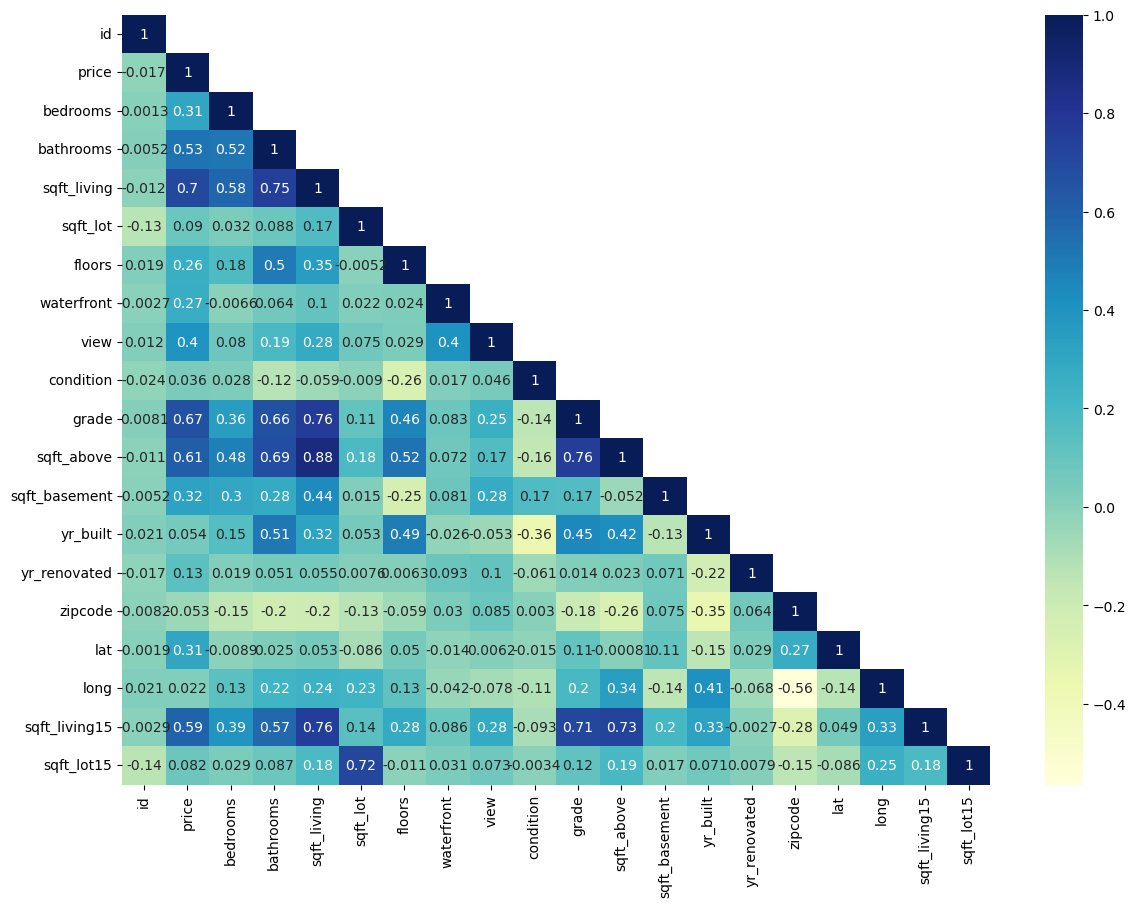

In [3]:
# Correlation graphic
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

plt.figure(figsize=(14,10))
corr_df = corr = df.select_dtypes(include=numerics).corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap = sns.heatmap(df_lt, cmap='YlGnBu', annot=True)

In [4]:
# Visualize columns and number of columns
print('List of Columns')
print('----------------------------------------------------------------------------------')
print(df.columns)
print(len(df.columns), 'columns.')

# Numerical columns (19)
cols_num = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
            'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
           'lat', 'long', 'sqft_living15', 'sqft_lot15']

List of Columns
----------------------------------------------------------------------------------
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
21 columns.


/var/folders/kc/sj9l8byj6ssgcctgfvyh7gx80000gn/T/ipykernel_19270/450169751.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=axes[i//4, i%4], kde=False)


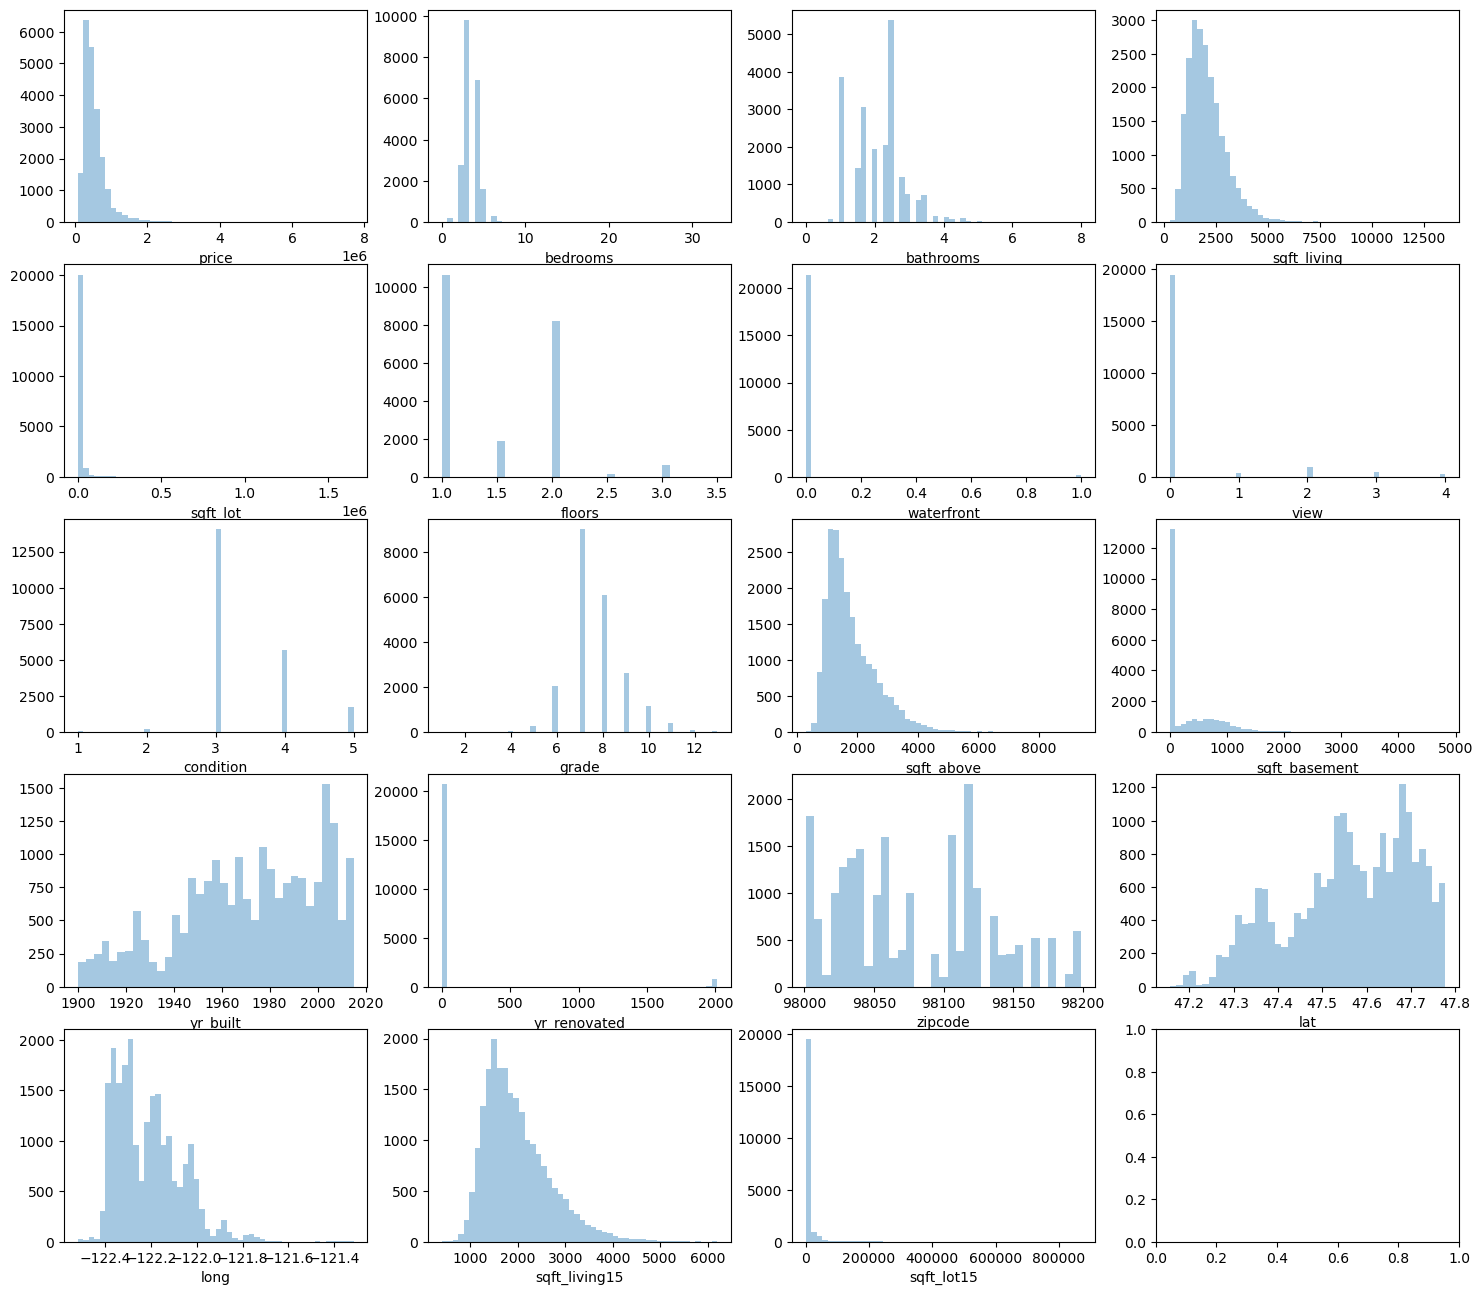

In [5]:
# Gráfica exploratoria de todas las columnas
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18,16))
for i, column in enumerate(cols_num):
    sns.distplot(df[column], ax=axes[i//4, i%4], kde=False)

# Agrupamiento

In [13]:
# Agrupamiento general por variables: waterfront
df.select_dtypes(include=numerics).groupby(['waterfront']).median()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
waterfront,,,,,,,,,,,,,,,,,,,
0,3904935400.00,450000.00,3.00,2.25,1910.00,7588.50,1.50,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1830.00,7600.00
1,3761100045.00,1400000.00,3.00,2.50,2850.00,17342.00,2.00,4.00,3.00,9.00,2180.00,500.00,1960.00,0.00,98075.00,47.54,-122.28,2660.00,15959.00


In [14]:
# Agrupamiento general por variables: floors
df.select_dtypes(include=numerics).groupby(['floors']).median()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
floors,,,,,,,,,,,,,,,,,,,
1.00,3884800600.50,390000.00,3.00,1.75,1630.00,8337.00,0.00,0.00,3.00,7.00,1260.00,200.00,1962.00,0.00,98070.00,47.56,-122.27,1680.00,8173.50
1.50,3856904632.50,524475.00,3.00,1.75,1760.00,5962.50,0.00,0.00,4.00,7.00,1530.00,0.00,1928.00,0.00,98115.00,47.63,-122.31,1660.00,5700.00
2.00,3982700125.00,542950.00,4.00,2.50,2440.00,7089.00,0.00,0.00,3.00,8.00,2311.00,0.00,1998.00,0.00,98055.00,47.56,-122.17,2260.00,7113.00
2.50,3751601877.00,799200.00,4.00,2.50,2850.00,5474.00,0.00,0.00,3.00,9.00,2710.00,60.00,1977.00,0.00,98106.00,47.62,-122.30,2240.00,5352.00
3.00,3448000410.00,490000.00,3.00,2.50,1500.00,1323.00,0.00,0.00,3.00,8.00,1480.00,0.00,2007.00,0.00,98109.00,47.67,-122.35,1470.00,1466.00
3.50,1972201219.00,534500.00,3.00,2.62,1730.00,1331.00,0.00,0.00,3.00,8.00,1730.00,0.00,2005.50,0.00,98104.00,47.65,-122.33,1405.00,1331.00


<Axes: xlabel='floors'>

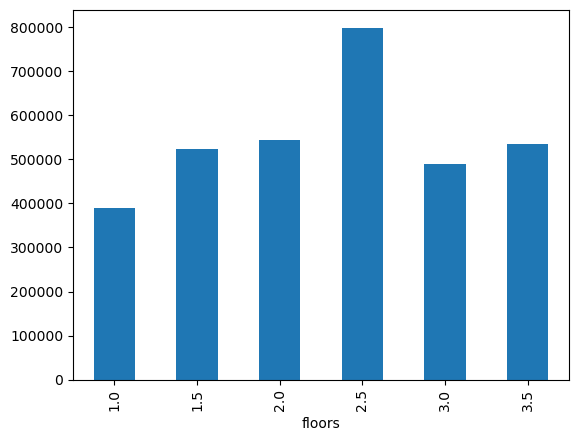

In [15]:
# Gráficos de análisis rápido
# Gráficos de Precios por Número de Pisos
df.select_dtypes(include=numerics).groupby(['floors']).median()['price'].plot.bar()

<Axes: xlabel='yr_built'>

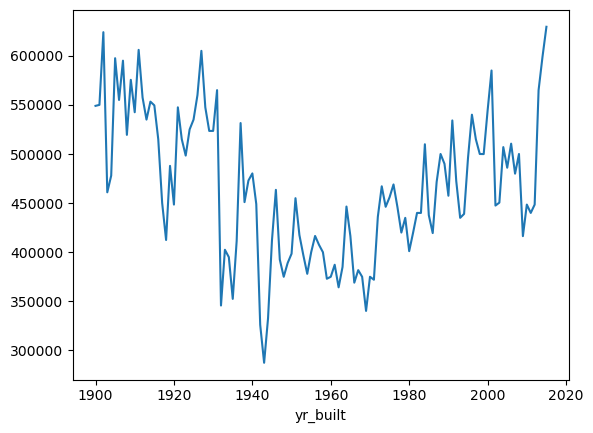

In [16]:
df.groupby(['yr_built'])['price'].median().plot.line()

<Axes: xlabel='zipcode'>

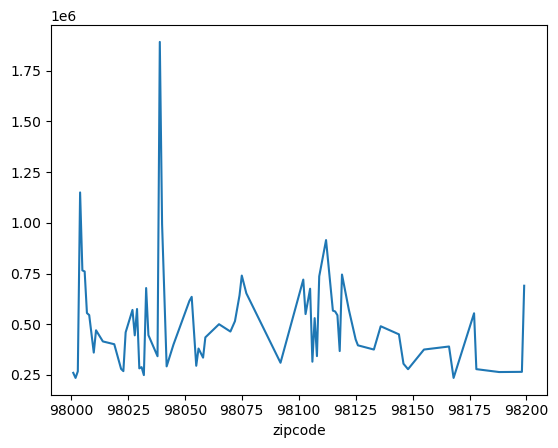

In [18]:
df.groupby(['zipcode'])['price'].median().plot.line()

In [20]:
# Agrupamiento general por variables: bedrooms
df.select_dtypes(include=numerics).groupby(['bedrooms']).median()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,,,,,,,,,,,,,,,,,,,
0,3918400017.00,288000.00,0.00,1470.00,5900.00,2.00,0.00,0.00,3.00,7.00,1470.00,0.00,1990.00,0.00,98065.00,47.53,-122.17,1810.00,7200.00
1,3340401535.00,299000.00,1.00,780.00,5750.00,1.00,0.00,0.00,3.00,6.00,760.00,0.00,1940.00,0.00,98116.00,47.56,-122.31,1360.00,5650.00
2,3904100050.00,374000.00,1.00,1140.00,5244.00,1.00,0.00,0.00,3.00,7.00,1010.00,0.00,1948.00,0.00,98116.00,47.60,-122.32,1430.00,5400.00
3,3856904795.00,413000.00,2.00,1680.00,7629.50,1.00,0.00,0.00,3.00,7.00,1440.00,0.00,1976.00,0.00,98059.00,47.57,-122.23,1720.00,7688.50
4,4029950105.00,549997.50,2.50,2410.00,8100.00,2.00,0.00,0.00,3.00,8.00,2080.00,0.00,1980.00,0.00,98056.00,47.57,-122.19,2190.00,8000.00
5,4036400040.00,620000.00,2.75,2870.00,8925.00,2.00,0.00,0.00,3.00,8.00,2190.00,700.00,1975.00,0.00,98056.00,47.58,-122.21,2280.00,8550.00
6,3876050645.00,650000.00,3.00,2955.00,8696.00,2.00,0.00,0.00,3.00,8.00,2340.00,885.00,1966.00,0.00,98097.00,47.60,-122.27,2095.00,8241.00
7,3618729798.00,728580.00,3.50,3335.00,8836.00,2.00,0.00,0.00,3.00,8.00,2820.00,750.00,1964.50,0.00,98104.00,47.62,-122.28,2215.00,8088.00
8,3756900027.00,700000.00,3.25,3840.00,7500.00,2.00,0.00,0.00,3.00,8.00,2530.00,1300.00,1962.00,0.00,98105.00,47.63,-122.30,1780.00,7624.00


# Análisis Bivariado

In [21]:
# Análisis Bivariado de Pisos con Waterfront para entender la data
pd.crosstab(df['waterfront'], df['floors'])

floors,1.00,1.50,2.00,2.50,3.00,3.50
waterfront,,,,,,
0,10623,1889,8166,159,605,8
1,57,21,75,2,8,0


In [22]:
# Porcentajes horizontales
pd.crosstab(df['waterfront'], df['floors'], normalize='index')

floors,1.00,1.50,2.00,2.50,3.00,3.50
waterfront,,,,,,
0,0.50,0.09,0.38,0.01,0.03,0.00
1,0.35,0.13,0.46,0.01,0.05,0.00


<Axes: xlabel='grade'>

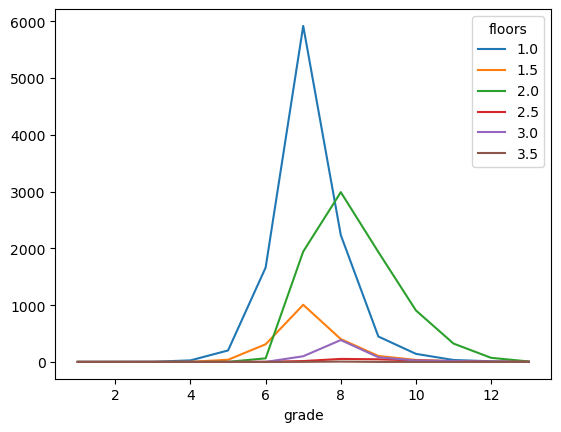

In [23]:
# Esta es la gráfica de texto
pd.crosstab(df['grade'], df['floors']).plot()

In [24]:
# Desglose de los datos según pisos y score de la casa
pd.crosstab(df['grade'], df['floors'], margins=True, margins_name='Total')

floors,1.0,1.5,2.0,2.5,3.0,3.5,Total
grade,,,,,,,
1,1,0,0,0,0,0,1
3,3,0,0,0,0,0,3
4,27,2,0,0,0,0,29
5,202,38,2,0,0,0,242
6,1662,311,63,2,0,0,2038
7,5916,1006,1943,15,100,1,8981
8,2233,402,2989,53,385,6,6068
9,447,105,1935,46,82,0,2615
10,142,35,906,26,25,0,1134


In [25]:
# Se puede ver el precio promedio según el grade y los pisos
dfct1 = pd.crosstab(df['grade'], df['floors'], values=df.price, aggfunc='mean', margins=True, margins_name='Total')
dfct1 = dfct1.replace(np.nan, 0)
dfct1

floors,1.0,1.5,2.0,2.5,3.0,3.5,Total
grade,,,,,,,
1,142000.00,0.00,0.00,0.00,0.00,0.00,142000.00
3,205666.67,0.00,0.00,0.00,0.00,0.00,205666.67
4,216187.04,190000.00,0.00,0.00,0.00,0.00,214381.03
5,244425.53,270364.32,247500.00,0.00,0.00,0.00,248523.97
6,294411.45,341526.30,302590.71,361250.00,0.00,0.00,301919.64
7,390574.93,503890.61,386962.93,516613.27,373947.39,1095000.00,402590.26
8,552791.38,696781.78,519103.51,643799.36,495449.12,511916.67,542852.77
9,856428.37,950667.83,740172.50,940176.52,787944.76,0.00,773513.19
10,1161105.12,1271418.57,1033278.10,1537926.92,1195030.60,0.00,1071771.07


In [26]:
dfct1.style.background_gradient(cmap='Greens')\
        .set_properties(**{'font-size': '10px'})

# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
# 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

floors,1.000000,1.500000,2.000000,2.500000,3.000000,3.500000,Total
grade,,,,,,,
1,142000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142000.000000
3,205666.666667,0.000000,0.000000,0.000000,0.000000,0.000000,205666.666667
4,216187.037037,190000.000000,0.000000,0.000000,0.000000,0.000000,214381.034483
5,244425.529703,270364.315789,247500.000000,0.000000,0.000000,0.000000,248523.971074
6,294411.447653,341526.302251,302590.714286,361250.000000,0.000000,0.000000,301919.637390
7,390574.927485,503890.614314,386962.933093,516613.266667,373947.390000,1095000.000000,402590.262332
8,552791.376623,696781.776119,519103.507862,643799.358491,495449.124675,511916.666667,542852.765656
9,856428.369128,950667.828571,740172.500258,940176.521739,787944.756098,0.000000,773513.185851
10,1161105.119718,1271418.571429,1033278.097130,1537926.923077,1195030.600000,0.000000,1071771.074074


# Descubrimientos (Insights)

In [27]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13453,8921000040,20140625T000000,804100.00,4,2.50,3070,8086,2.00,0,0,...,10,3070.00,0,2005,0,98059,47.54,-122.16,3320,10738
11728,7154200070,20141124T000000,995000.00,5,3.25,3970,8029,2.00,0,2,...,9,2970.00,1000,1979,0,98177,47.78,-122.39,2520,8214
2827,7805450750,20150120T000000,864000.00,3,2.75,3060,13554,2.00,0,0,...,10,3060.00,0,1984,0,98006,47.56,-122.11,3060,11455
500,7852170140,20150510T000000,650000.00,4,2.50,3180,5438,2.00,0,0,...,9,3180.00,0,2003,0,98065,47.54,-121.86,3030,5335
3860,3447000100,20150422T000000,645000.00,4,2.50,2250,10696,2.00,0,0,...,8,2250.00,0,1996,0,98006,47.57,-122.13,2340,13286


In [28]:
# Ver el número de casas por año de construcción (yr_built), usando groupby
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
df.groupby('yr_built')['yr_built'].count()

yr_built
1900     87
1901     29
1902     27
1903     46
1904     45
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Name: yr_built, Length: 116, dtype: int64

<Axes: xlabel='yr_built'>

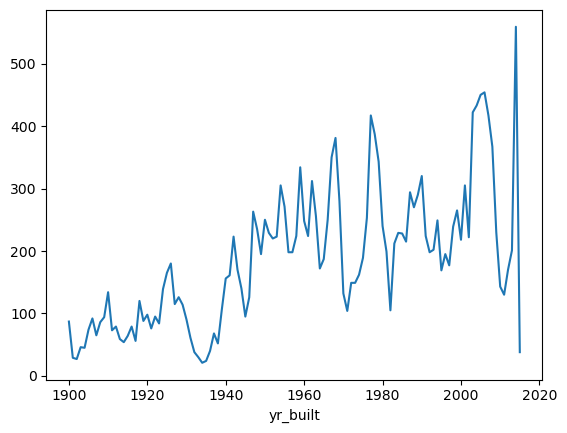

In [29]:
# Gráfico rápido
df.groupby('yr_built')['yr_built'].count().plot()

<Axes: xlabel='yr_built'>

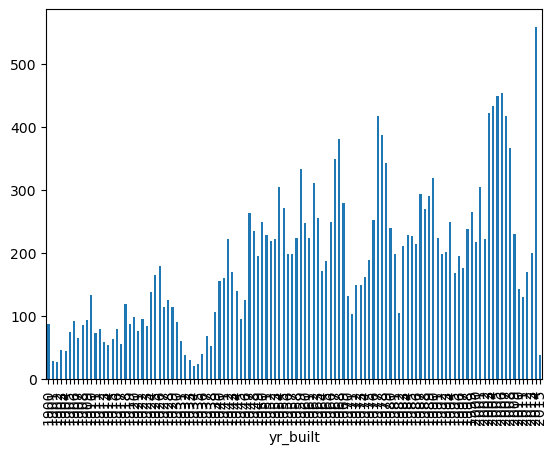

In [31]:
df.groupby('yr_built')['yr_built'].count().plot.bar()

<Axes: xlabel='yr_built'>

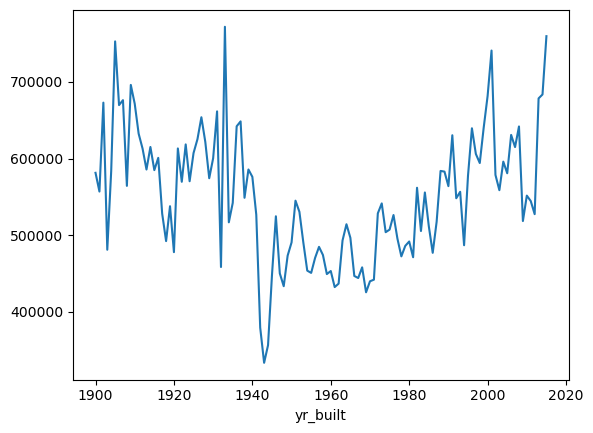

In [32]:
# Año y condición promedio
df.groupby('yr_built')['price'].mean().plot()

In [34]:
# Por año
df.groupby('yr_built')[['floors', 'sqft_living', 'sqft_lot', 'price', 'grade']].mean()

,floors,sqft_living,sqft_lot,price,grade
yr_built,,,,,
1900,1.51,1732.01,10869.60,581387.21,6.87
1901,1.57,1763.62,4142.93,556935.93,7.03
1902,1.74,1919.63,4766.52,673007.41,7.44
1903,1.46,1507.74,6364.57,480958.20,6.87
1904,1.34,1603.18,5410.00,583756.64,6.91
...,...,...,...,...,...
2011,2.02,2313.68,6519.69,544522.00,8.18
2012,1.99,2378.74,6085.54,527447.34,8.18
2013,2.04,2636.59,7338.08,678545.45,8.47


<Axes: xlabel='yr_built'>

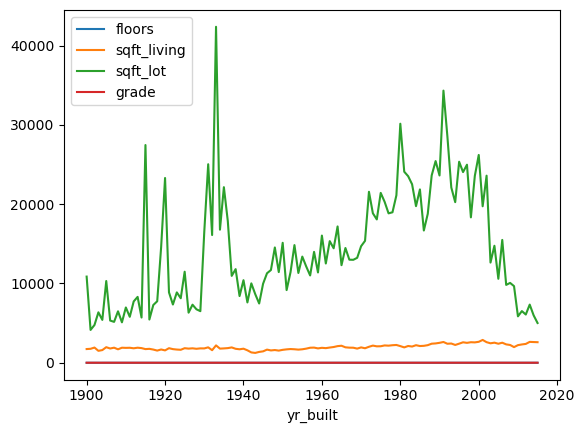

In [35]:
# Si se plotea la información, automáticamente se generan series
df.groupby('yr_built')[['floors', 'sqft_living', 'sqft_lot', 'grade']].mean().plot()

<Axes: ylabel='zipcode'>

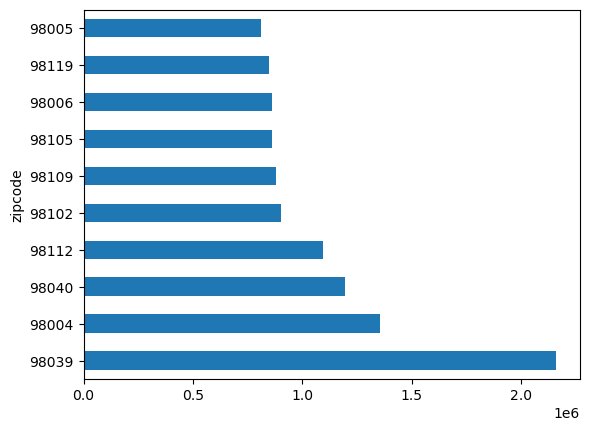

In [36]:
# Top 10 zipcodes con mayor precio promedio
df.groupby('zipcode')['price'].mean()
# Se añade la condición de ordenamiento sort_values
df.groupby('zipcode')['price'].mean().sort_values(ascending=False)
# Se añade la condición de traer los 10 primeros
df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10)
# Se visualiza la información con un gráfico de barras horizontales
df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10).plot.barh()

<Axes: ylabel='zipcode'>

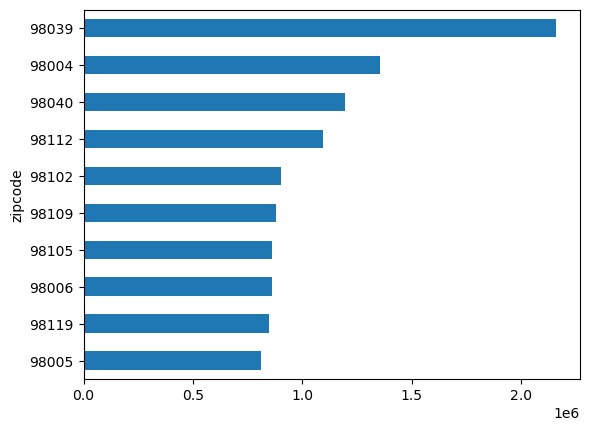

In [37]:
# Grafica las barras horizontales como un tornado (iloc le da la vuelta a los datos)
df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10).iloc[::-1].plot.barh()

In [38]:
pd.options.display.float_format = '{:.2f}'.format

# Top 10 zipcodes con mayor precio promedio desglosados si es que tienen o no vista a un lago o río
# Trae los top 50 valores de todo el dataset
df2 = df.groupby(['zipcode', 'waterfront'])['price'].mean().sort_values(ascending=False).head(50)
df2.head() # Cómo quitar el formato científico de algunas columnas

zipcode  waterfront
98004    1            7062500.00
98039    1            3640900.00
98033    1            3444950.00
98105    1            3051666.67
98040    1            2960416.67
Name: price, dtype: float64

In [39]:
# Mueve las columnas del dataframe a 0 y 1 para mostrar si tiene waterfront
df2.unstack().head(10)

waterfront,0,1
zipcode,,
98004,1337868.31,7062500.00
98039,2130396.53,3640900.00
98033,779035.13,3444950.00
98105,833769.81,3051666.67
98040,1115732.84,2960416.67
98144,NaN,2750000.00
98008,NaN,2571666.67
98034,NaN,2481666.67
98027,NaN,2400000.00


In [40]:
# Agrupa por pisos
df3 = df.groupby(['zipcode', 'floors'])['price'].mean().sort_values(ascending=False).head(100)
df3.unstack().head(10)

floors,1.00,1.50,2.00,2.50,3.00,3.50
zipcode,,,,,,
98112,827606.58,911528.88,1190472.75,1648095.24,908078.46,3300000.00
98008,NaN,763571.43,925086.67,2789000.00,NaN,NaN
98039,1526040.91,NaN,2659193.93,NaN,NaN,NaN
98033,NaN,707906.25,979655.62,2350000.00,NaN,NaN
98053,NaN,710625.00,732626.21,958333.33,2280000.00,NaN
98040,968852.84,1272253.57,1419608.39,1061880.00,2252666.67,NaN
98144,NaN,NaN,NaN,1846000.00,NaN,NaN
98102,NaN,758210.83,862671.86,1826312.00,739375.00,1095000.00
98004,1125796.78,1537089.29,1700077.57,NaN,781700.00,NaN


<Axes: xlabel='zipcode'>

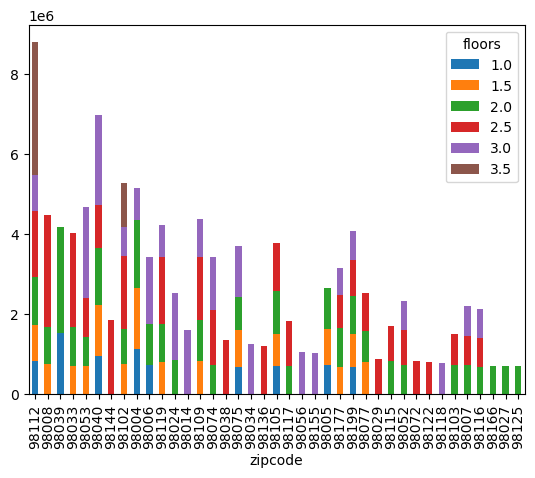

In [41]:
# Muestra una gráfica de barras stackeadas los distintos números de piso
df3.unstack().plot.bar(stacked=True)

In [42]:
# Matriz zipcode y año con precio
df4 = df.groupby(['yr_built', 'zipcode'])['price'].mean().sort_values(ascending=False).head(100)
df4

yr_built  zipcode
1940      98004     7062500.00
2004      98155     4500000.00
2001      98039     4204500.00
2008      98039     4000000.00
2000      98039     3710000.00
                       ...    
1908      98004     1749000.00
2015      98112     1749000.00
1937      98112     1738000.00
2013      98040     1724950.00
1959      98039     1712750.00
Name: price, Length: 100, dtype: float64

In [43]:
# Se genera un nuevo DF con la matriz
df5 = df4.unstack()
df5.head()

zipcode,98004,98155,98039,98008,98034,98040,98107,98109,98177,98006,...,98053,98052,98199,98102,98116,98125,98074,98105,98005,98115
yr_built,,,,,,,,,,,,,,,,,,,,,
1940,7062500.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,2312233.33,4500000.00,2187730.00,NaN,NaN,2298000.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,2381250.00,NaN,4204500.00,2989000.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,1756589.21,NaN,4000000.00,NaN,NaN,2090000.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,3710000.00,NaN,NaN,1831666.67,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Se reemplazan los NaN con ceros
df5.replace(np.nan, 0)

zipcode,98004,98155,98039,98008,98034,98040,98107,98109,98177,98006,...,98053,98052,98199,98102,98116,98125,98074,98105,98005,98115
yr_built,,,,,,,,,,,,,,,,,,,,,
1940,7062500.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2004,2312233.33,4500000.00,2187730.00,0.00,0.00,2298000.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2001,2381250.00,0.00,4204500.00,2989000.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2008,1756589.21,0.00,4000000.00,0.00,0.00,2090000.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2000,0.00,0.00,3710000.00,0.00,0.00,1831666.67,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,0.00,0.00,1762000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1927,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1755000.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1926,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1750000.00,0.00,0.00,0.00,0.00,0.00,0.00


In [45]:
# Finalmente, se obtiene una matriz más compleja, con zipcode, año y waterfront
df6 = df.groupby(['yr_built', 'zipcode', 'waterfront'])['price'].mean().sort_values(ascending=False).head(100)
df6

yr_built  zipcode  waterfront
1940      98004    1            7062500.00
1991      98040    1            5300000.00
1983      98040    1            4668000.00
2004      98155    1            4500000.00
2001      98039    0            4204500.00
                                   ...    
1950      98039    0            1920000.00
2007      98004    0            1914545.45
1955      98112    0            1910000.00
1992      98004    0            1901000.00
1942      98144    1            1900000.00
Name: price, Length: 100, dtype: float64

In [46]:
type(df6)

pandas.core.series.Series

# Wrap Up
- Análisis Básico.
- Análisis Univariable.
- Análisis Correlación.
- Análisis Bivariado.
- Agrupaciones: groupby, crosstab, unstack
- Otros comandos: replace, plot